In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.io import loadmat
import seaborn as sns
%matplotlib inline 

# SVM with linear Kernels

In [3]:
data1 = loadmat('data/ex6data1.mat')
X=data1['X']
y=data1['y']

In [11]:
df1 = pd.concat([pd.DataFrame(X,columns=['x1','x2']),pd.DataFrame(y,columns=['y'])],axis=1)
df1.head()

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


D:\software\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='x1', ylabel='x2'>

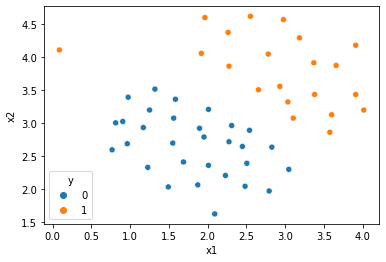

In [14]:
sns.scatterplot('x1','x2',hue='y',data=df1)

In [48]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000) #线性svm
svc

LinearSVC(C=1, loss='hinge')

In [49]:
y = y.ravel() # 将y变为1维 # 必须！！！
svc.fit(X,y) 
svc.score(X,y)

D:\software\anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

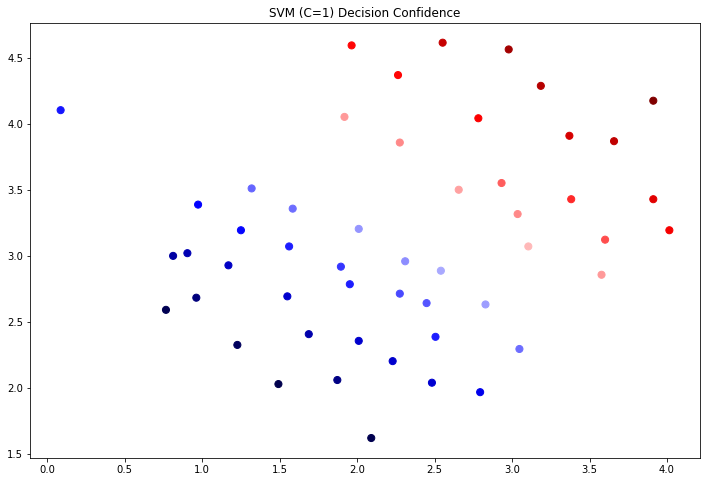

In [69]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0],X[:,1], s=50, c=svc.decision_function(X), cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

In [51]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(X,y) 
svc2.score(X,y)

D:\software\anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9019607843137255

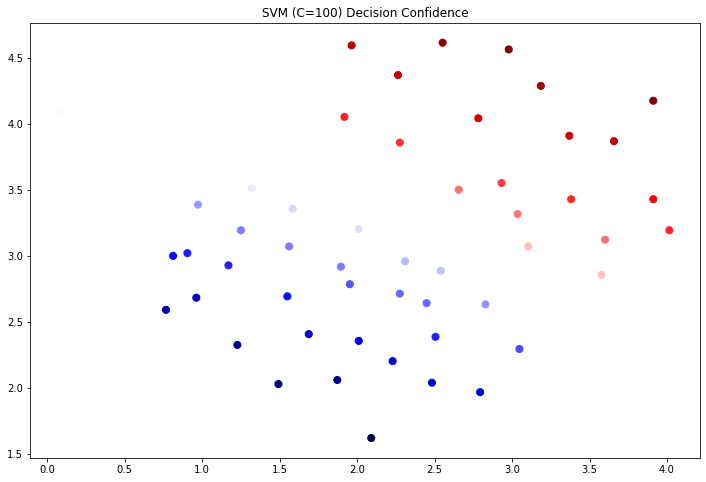

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0],X[:,1], s=50, c=svc2.decision_function(X), cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

# SVM with Gaussian Kernels

In [170]:
X=loadmat('data/ex6data2.mat')['X']
y= loadmat('data/ex6data2.mat')['y']
df=pd.concat([pd.DataFrame(X,columns=['x1','x2']),pd.DataFrame(y,columns=['y'])],axis=1)
df.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


D:\software\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='x1', ylabel='x2'>

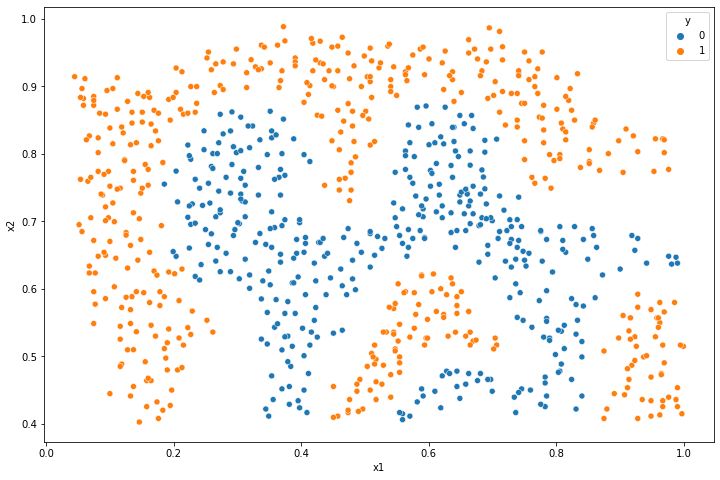

In [171]:
plt.figure(figsize=(12,8))
sns.scatterplot('x1','x2',hue='y',data=df)

In [4]:
from sklearn.svm import SVC

In [6]:
svc = SVC(C=100, gamma=100, probability=True) # 默认kernel 是 Gaussian RBF
svc 

SVC(C=100, gamma=100, probability=True)

In [174]:
y= y.ravel()
svc.fit(X,y)
svc.score(X,y) #准确率达到了~100%

0.9988412514484357

In [175]:
x1plot = np.linspace(min(X[:,0]),max(X[:,0]),100)
x2plot = np.linspace(min(X[:,1]),max(X[:,1]),100)
xx,yy = np.meshgrid(x1plot,x2plot) # 建立格点
vals = np.zeros(xx.shape) # 初始化val

In [203]:
for i in range(xx.shape[1]):
    this_X = np.vstack((xx[:,i],yy[:,i])).T
    vals[:,i] = svc.predict(this_X) # 计算格点的预测值

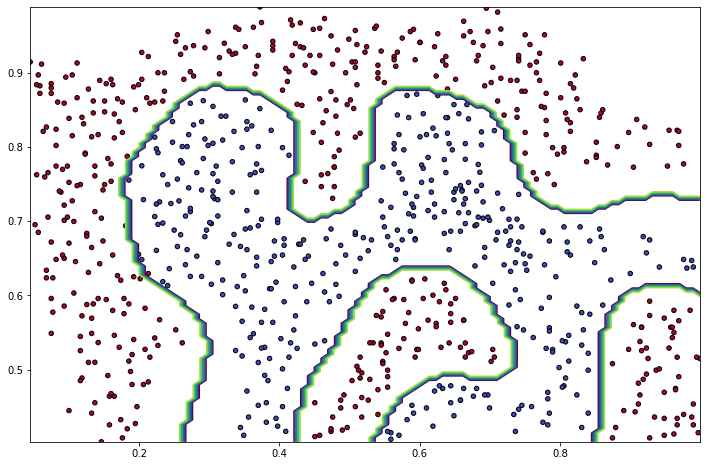

In [210]:
plt.figure(figsize=(12,8))
plt.scatter(df.x1, df.x2, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k') # 把点画进去
plt.contour(xx,yy,vals) ###how cool is that bitch !!! # 把等高线画进去

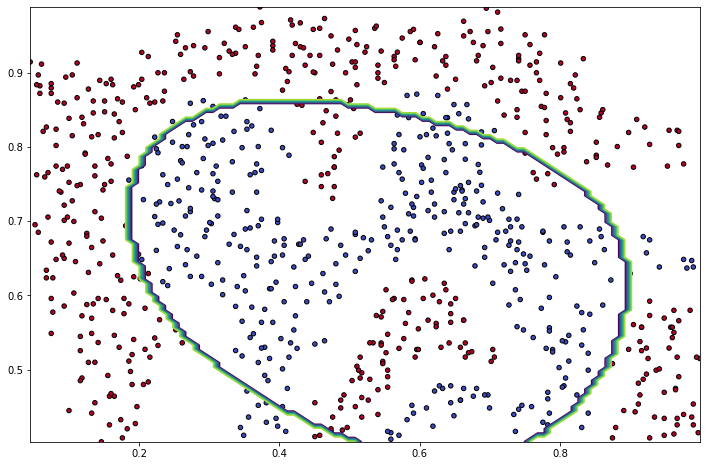

In [215]:
svc2  = SVC(C=100, gamma=1, probability=True) # try gamma = 1
svc2.fit(X,y)
svc2.score(X,y)
for i in range(xx.shape[1]):
    this_X = np.vstack((xx[:,i],yy[:,i])).T
    vals[:,i] = svc2.predict(this_X)
plt.figure(figsize=(12,8))
plt.scatter(df.x1, df.x2, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.contour(xx,yy,vals) ###how cool is that bitch !!!

## 可以看到gamma值对预测结果的影响非常大！

# Spam Classification

In [3]:
trainX = loadmat('data/spamTrain.mat')['X']
trainy = loadmat('data/spamTrain.mat')['y']
testX= loadmat('data/spamTest.mat')['Xtest']
testy = loadmat('data/spamTest.mat')['ytest']
trainy = trainy.ravel()

In [7]:
svc.fit(trainX,trainy)
svc.score(trainX,trainy)

1.0

In [9]:
pred = svc.predict(testX)

In [10]:
from sklearn import metrics

In [13]:
print(metrics.classification_report(testy, pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       692
           1       1.00      0.34      0.51       308

    accuracy                           0.80      1000
   macro avg       0.89      0.67      0.69      1000
weighted avg       0.84      0.80      0.76      1000



In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logist = LogisticRegression()
logist.fit(trainX,trainy)

LogisticRegression()

In [20]:
logist.score(trainX,trainy)
pred = logist.predict(testX)

In [21]:
print(metrics.classification_report(testy, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       692
           1       0.99      0.99      0.99       308

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



# 可以看到线性回归的表现要比svm好